<h1>Solar System</h1>
<h2>Intial Conditions</h2>
<p>All inital positions and velocites are based on 1 February 2022 at 00:00</p>
<p>All position/velocity units are measured in KM</p>
<p>G was changed by a magnitude of 1 milllion due to the conversion from m^3 to km^3</p>
<p>Object parameters were based on actual values but scaled visually. In order to properly view the vastness of the solar system with relative ease, the radii of each planet/star were scaled. This scaled value is not used within later calculations but only for visual effects. Also the scale amount is not consistant about each planet/star simply due to visual needs within the simulation. You can see the scale amounts per each planet/star when each object is initailized, it is mulitplied by the actual radii of each planet/star.</p>
<p>Simulation time was decided based on a guess and check method to determine what simulation speed seemed pleasent to the eyes while still allowing for simulation completion.</p>

<h2>Approach</h2>
<p>All values found were based on NASA's horizions app and the units were set to kilometers and seconds</p>
<p>When approaching the calculations, it was decided that the best approach was to relate the velocity of the objects to the force and mass directily through momentum. Momentum = mass * velocity so it only seemed like the right choice. After finding the gravitational force (GForce) of each object on each object (ie. the summation of all individial GForces) the Euler-Cromer method for derivation was used to relate momentum and force directly to position. The next state momentum = previous momentum + (net force * dt). This is due to force being the momentum over time of an object, we can therefore derive momentum that way. Position was then related to the momentum by the equation next position = previous position + ((next momentum * dt)/mass).</p>
<p>The data structures that were used were primarily lists and dictionaries. Lists were used to store the values that we wanted to graph after the simulation was over in order to visually validate our findings. Dictionaries were used as the primary storage source for the data realted to each planet/star. The dictionary "solarObjects" is a nested dictionary that contains 5 dictionaries, each containing data regarding their respective planets/stars. Dictionaries were used to that values were not forced to be stored within the vpython objects directly and impact performance even more, they are also better visually and allow for the user to understand the structure of the stored data.</p>
<p>Functions were used sparingly however, they were used for the purpose of allowing ease of reading for the user and allowing each code block to become more compact when running. They were also used to enable the simulation to update values and perform calculations before they effected the other planets/stars. </p>

In [1]:
################### IMPORTS ###################
from vpython import *
import matplotlib.pyplot as pyplot
import numpy as np
################### SET UP CANVAS ###################
scene=canvas() 
scene.caption = " Number of Distinct Hamiltionian Cycles on Kn = (n − 1)!/2.\n At n = 14, we have 3.11*10^9. For reference, Neptune is approximately 2.85*10^9 miles from Earth (01Feb2022).\n A rocket ship traveling 7.78 km/s would take roughly 18 years to get to Neptune.\n Our rocket ship is the green line traveling to the outermost purple orbit."

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
################### CONSTANTS ###################
G = 6.674e-20 #gravitational constant [km^3*kg^-1*s^-2]
max_time = 1e5

In [3]:
################### DATA STRUCTURES ###################
sun = {
    "mass": 1.989e30, #[kg]
    "pos": vector(0,0,0),
    "velocity": vector(0,0,0), #[km/s]
    "radius": 696000, #[km]
    "momentum": vector(0,0,0), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
mercury = {
    "mass": 3.285e23, #[kg]
    "pos": vector(-5.343e7,1.1272e7,5.941e6),
    "velocity": vector(-2.137e1,-4.530e1,-1.740), #[km/s]
    "radius": 2440, #[km]
    "momentum": 3.285e23*vector(-2.137e1,-4.530e1,-1.740), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
venus = {
    "mass": 4.868e24, #[kg]
    "pos": vector(-8.869e7,6.045e7,5.947e6),
    "velocity": vector(-1.986e1,-2.911e1,7.465e-1), #[km/s]
    "radius": 6051, #[km]
    "momentum": 4.868e24*vector(-1.986e1,-2.911e1,7.465e-1), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
earth = {
    "mass": 5.972e24, #[kg]
    "pos": vector(-9.822e7,1.099e8,-4.540e3),
    "velocity": vector(-2.270e1,-1.997e1,1.517e-3), #[km/s]
    "radius": 6371, #[km]
    "momentum": 5.972e24*vector(-2.270e1,-1.997e1,1.517e-3), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
mars = {
    "mass": 6.417e23, #[kg]
    "pos": vector(-6.922e7,-2.128e8,-2.762e6),
    "velocity": vector(2.395e1,-5.412,-7.009e-1), #[km/s]
    "radius": 3389, #[km]
    "momentum": 6.417e23*vector(2.395e1,-5.412,-7.009e-1), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
jupiter = {
    "mass": 1.898e27, #[kg]
    "pos": vector(7.082e8,-2.338e8,-1.487e7),
    "velocity": vector(3.945,1.303e1,-1.424e-1), #[km/s]
    "radius": 71492, #[km]
    "momentum": 1.898e27*vector(3.945,1.303e1,-1.424e-1), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
saturn = {
    "mass": 5.683e26, #[kg]
    "pos": vector(1.058e9,-1.039e9,-2.405e7),
    "velocity": vector(6.236,6.885,-3.679e-1), #[km/s]
    "radius": 60268, #[km]
    "momentum": 5.683e26*vector(6.236,6.885,-3.679e-1), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
uranus = {
    "mass": 8.681e25, #[kg]
    "pos": vector(2.141e9,2.029e9,-2.021e7),
    "velocity": vector(-4.731,4.639,7.816e-2), #[km/s]
    "radius": 25559, #[km]
    "momentum": 8.681e25*vector(-4.731,4.639,7.816e-2), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
neptune = {
    "mass": 1.024e26, #[kg]
    "pos": vector(4.435e9,-5.974e8,-8.991e7),
    "velocity": vector(6.953e-1,5.434,-1.280e-1), #[km/s]
    "radius": 24624, #[km]
    "momentum": 1.024e26*vector(6.953e-1,5.434,-1.280e-1), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
rocket = {
    "mass": 122683, #[kg]
    "pos": vector(-9.822e7,1.099e8,-4.540e3),
    "velocity": vector(7.78,0,0), #[km/s]
    "radius": 0.00435, #[km]
    "momentum": 122683*vector(7.78,0,0), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }

solarObjects = { #empty dictionary meant to hold all objects
    "sun": sun,
    "mercury": mercury,
    "venus": venus,
    "earth": earth,
    "mars": mars,
    "jupiter": jupiter,
    "saturn": saturn,
    "uranus": uranus,
    "neptune": neptune,
    "rocket": rocket
      } 

#store the average orbital velocites at each point in time
mercuryV = []
venusV = []
earthV = []
marsV = []
jupiterV = []
saturnV = []
uranusV = []
neptuneV = []
time = []

In [4]:
################### OBJECTS ###################
sun_sphere = sphere(
                pos=solarObjects['sun']['pos'],
                radius=solarObjects['sun']['radius']*20,
                color=color.yellow,
                label=label(pos=vector(0,0,0), text="Sun")
            )

mercury_sphere = sphere(
                pos=solarObjects['mercury']['pos'],
                radius=solarObjects['mercury']['radius']*1000,
                color=color.blue,
                make_trail = True,
                retain=50,
                label=label(pos=vector(-5.343e7,1.1272e7,5.941e6), text="Mercury")
            )

venus_sphere = sphere(
                pos=solarObjects['venus']['pos'],
                radius=solarObjects['venus']['radius']*800,
                color=color.orange,
                make_trail = True,
                retain=50,
                label=label(pos=vector(-8.869e7,6.045e7,5.947e6), text="Venus")
            )

earth_sphere = sphere(
                pos=solarObjects['earth']['pos'],
                radius=solarObjects['earth']['radius']*800,
                color=color.green,
                make_trail = True,
                retain=50,
                label=label(pos=vector(-9.822e7,1.099e8,-4.540e3), text="Earth")
            )

mars_sphere = sphere(
                pos=solarObjects['mars']['pos'],
                radius=solarObjects['mars']['radius']*1000,
                color=color.red,
                make_trail = True,
                retain=50,
                label=label(pos=vector(-6.922e7,-2.128e8,-2.762e6), text="Mars")
            )

jupiter_sphere = sphere(
                pos=solarObjects['jupiter']['pos'],
                radius=solarObjects['jupiter']['radius']*1000,
                color=color.white,
                make_trail = True,
                label=label(pos=vector(7.082e8,-2.338e8,-1.487e7), pixel_pos=True, text="Jupiter")
            )

saturn_sphere = sphere(
                pos=solarObjects['saturn']['pos'],
                radius=solarObjects['saturn']['radius']*1000,
                color=color.cyan,
                make_trail = True,
                label=label(pos=vector(1.058e9,-1.039e9,-2.405e7), text="Saturn")
            )

uranus_sphere = sphere(
                pos=solarObjects['uranus']['pos'],
                radius=solarObjects['uranus']['radius']*1000,
                color=color.magenta,
                make_trail = True,
                label=label(pos=vector(2.141e9,2.029e9,-2.021e7), text="Uranus")
            )

neptune_sphere = sphere(
                pos=solarObjects['neptune']['pos'],
                radius=solarObjects['neptune']['radius']*1000,
                color=color.purple,
                make_trail = True,
                label=label(pos=vector(4.435e9,-5.974e8,-8.991e7), text="Neptune")
            )

rocket_sphere = helix(
                pos=solarObjects['rocket']['pos'],
                radius=solarObjects['rocket']['radius']*10000,
                color=color.green,
                make_trail = True,
                label=label(pos=vector(-9.822e7,1.099e8,-4.540e3), text="Rocket")
            )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
################### INITIAL CONDITIONS ###################
t = 0 #[s]
dt = 100000 #[s] 
count = 0

In [6]:
################### FUNCTIONS ###################
def GForce(p1,p2): #force exterted on p1 by p2
    r = p1['pos'] - p2['pos']
    F = -G*p1['mass']*p2['mass']*norm(r)/mag(r)**2
    return F

def UpdateValues(p1):
    p = p1['momentum'] + p1['GForce']*dt
    pos = p1['pos'] + p*dt/p1['mass']
    return p, pos

In [7]:
################### MAIN LOOP ###################
time_label = label(pos=vector(75, 350, 0), pixel_pos=True, text="Time: " + str(count/365) + " years")
while count < 56000:
    rate(500)
    
    #Sum all of the forces on each solar object 
    solarObjects['mercury']['GForce'] = GForce(solarObjects['mercury'], solarObjects['sun'])\
                                        + GForce(solarObjects['mercury'], solarObjects['venus'])\
                                        + GForce(solarObjects['mercury'], solarObjects['earth'])\
                                        + GForce(solarObjects['mercury'], solarObjects['mars'])\
                                        + GForce(solarObjects['mercury'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['mercury'], solarObjects['saturn'])\
                                        + GForce(solarObjects['mercury'], solarObjects['uranus'])\
                                        + GForce(solarObjects['mercury'], solarObjects['neptune'])

    solarObjects['venus']['GForce'] = GForce(solarObjects['venus'], solarObjects['sun'])\
                                        + GForce(solarObjects['venus'], solarObjects['mercury'])\
                                        + GForce(solarObjects['venus'], solarObjects['earth'])\
                                        + GForce(solarObjects['venus'], solarObjects['mars'])\
                                        + GForce(solarObjects['venus'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['venus'], solarObjects['saturn'])\
                                        + GForce(solarObjects['venus'], solarObjects['uranus'])\
                                        + GForce(solarObjects['venus'], solarObjects['neptune'])

    solarObjects['earth']['GForce'] = GForce(solarObjects['earth'], solarObjects['sun'])\
                                        + GForce(solarObjects['earth'], solarObjects['mercury'])\
                                        + GForce(solarObjects['earth'], solarObjects['venus'])\
                                        + GForce(solarObjects['earth'], solarObjects['mars'])\
                                        + GForce(solarObjects['earth'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['earth'], solarObjects['saturn'])\
                                        + GForce(solarObjects['earth'], solarObjects['uranus'])\
                                        + GForce(solarObjects['earth'], solarObjects['neptune'])
    
    solarObjects['mars']['GForce'] = GForce(solarObjects['mars'], solarObjects['sun'])\
                                        + GForce(solarObjects['mars'], solarObjects['mercury'])\
                                        + GForce(solarObjects['mars'], solarObjects['venus'])\
                                        + GForce(solarObjects['mars'], solarObjects['earth'])\
                                        + GForce(solarObjects['mars'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['mars'], solarObjects['saturn'])\
                                        + GForce(solarObjects['mars'], solarObjects['uranus'])\
                                        + GForce(solarObjects['mars'], solarObjects['neptune'])
    
    solarObjects['jupiter']['GForce'] = GForce(solarObjects['jupiter'], solarObjects['sun'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['mercury'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['venus'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['mars'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['earth'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['saturn'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['uranus'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['neptune'])
    
    solarObjects['saturn']['GForce'] = GForce(solarObjects['saturn'], solarObjects['sun'])\
                                        + GForce(solarObjects['saturn'], solarObjects['mercury'])\
                                        + GForce(solarObjects['saturn'], solarObjects['venus'])\
                                        + GForce(solarObjects['saturn'], solarObjects['mars'])\
                                        + GForce(solarObjects['saturn'], solarObjects['earth'])\
                                        + GForce(solarObjects['saturn'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['saturn'], solarObjects['uranus'])\
                                        + GForce(solarObjects['saturn'], solarObjects['neptune'])
    
    solarObjects['uranus']['GForce'] = GForce(solarObjects['uranus'], solarObjects['sun'])\
                                        + GForce(solarObjects['uranus'], solarObjects['mercury'])\
                                        + GForce(solarObjects['uranus'], solarObjects['venus'])\
                                        + GForce(solarObjects['uranus'], solarObjects['mars'])\
                                        + GForce(solarObjects['uranus'], solarObjects['earth'])\
                                        + GForce(solarObjects['uranus'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['uranus'], solarObjects['saturn'])\
                                        + GForce(solarObjects['uranus'], solarObjects['neptune'])
    
    solarObjects['neptune']['GForce'] = GForce(solarObjects['neptune'], solarObjects['sun'])\
                                        + GForce(solarObjects['neptune'], solarObjects['mercury'])\
                                        + GForce(solarObjects['neptune'], solarObjects['venus'])\
                                        + GForce(solarObjects['neptune'], solarObjects['mars'])\
                                        + GForce(solarObjects['neptune'], solarObjects['earth'])\
                                        + GForce(solarObjects['neptune'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['neptune'], solarObjects['saturn'])\
                                        + GForce(solarObjects['neptune'], solarObjects['uranus'])

    #update the momentum and position of each solar object
    solarObjects['mercury']['momentum'], solarObjects['mercury']['pos'] = UpdateValues(solarObjects['mercury'])
    solarObjects['venus']['momentum'], solarObjects['venus']['pos'] = UpdateValues(solarObjects['venus'])    
    solarObjects['earth']['momentum'], solarObjects['earth']['pos'] = UpdateValues(solarObjects['earth'])
    solarObjects['mars']['momentum'], solarObjects['mars']['pos'] = UpdateValues(solarObjects['mars'])
    solarObjects['jupiter']['momentum'], solarObjects['jupiter']['pos'] = UpdateValues(solarObjects['jupiter'])
    solarObjects['saturn']['momentum'], solarObjects['saturn']['pos'] = UpdateValues(solarObjects['saturn'])
    solarObjects['uranus']['momentum'], solarObjects['uranus']['pos'] = UpdateValues(solarObjects['uranus'])
    solarObjects['neptune']['momentum'], solarObjects['neptune']['pos'] = UpdateValues(solarObjects['neptune'])
    
    #update labels
    mercury_sphere.label.pos = solarObjects['mercury']['pos']
    venus_sphere.label.pos = solarObjects['venus']['pos']
    earth_sphere.label.pos = solarObjects['earth']['pos']
    mars_sphere.label.pos = solarObjects['mars']['pos']
    jupiter_sphere.label.pos = solarObjects['jupiter']['pos']
    saturn_sphere.label.pos = solarObjects['saturn']['pos']
    uranus_sphere.label.pos = solarObjects['uranus']['pos']
    neptune_sphere.label.pos = solarObjects['neptune']['pos']
    
    #append values to the orbital velocity lists
    mercuryV.append(mag(solarObjects['mercury']['momentum']/solarObjects['mercury']['mass']))
    venusV.append(mag(solarObjects['venus']['momentum']/solarObjects['venus']['mass']))
    earthV.append(mag(solarObjects['earth']['momentum']/solarObjects['earth']['mass']))
    marsV.append(mag(solarObjects['mars']['momentum']/solarObjects['mars']['mass']))
    jupiterV.append(mag(solarObjects['jupiter']['momentum']/solarObjects['jupiter']['mass']))
    saturnV.append(mag(solarObjects['saturn']['momentum']/solarObjects['saturn']['mass']))
    uranusV.append(mag(solarObjects['uranus']['momentum']/solarObjects['uranus']['mass']))
    neptuneV.append(mag(solarObjects['neptune']['momentum']/solarObjects['neptune']['mass']))
    
    time.append(t)
    
    #set the visual position to that of the respective solar object
    mercury_sphere.pos = solarObjects['mercury']['pos']
    venus_sphere.pos = solarObjects['venus']['pos']
    earth_sphere.pos = solarObjects['earth']['pos']
    mars_sphere.pos = solarObjects['mars']['pos']
    jupiter_sphere.pos = solarObjects['jupiter']['pos']
    saturn_sphere.pos = solarObjects['saturn']['pos']
    uranus_sphere.pos = solarObjects['uranus']['pos']
    neptune_sphere.pos = solarObjects['neptune']['pos']
    
    if (count/330 >= 17.5): 
        rocket_sphere.pos = rocket_sphere.pos
        rocket_sphere.label.pos = rocket_sphere.pos
    else:
        speed = solarObjects['rocket']['velocity']
        rocket_sphere.pos += speed*dt
        rocket_sphere.label.pos = rocket_sphere.pos
    
    # Change to 350 to approximate
    time_label.text = "Time: {:.2f} years".format(count/330)
    count += 1
    t += dt

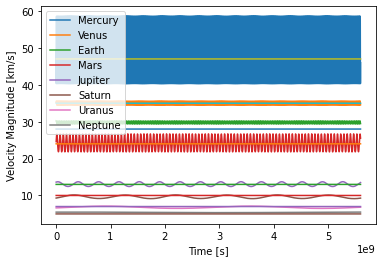

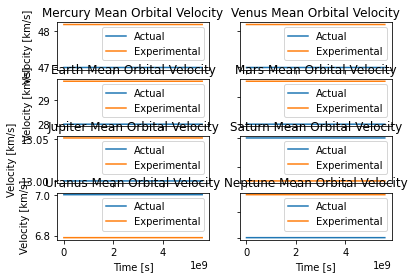

In [8]:
################### GRAPHING ###################
actualOV_mercury = [47] * len(time)
actualOV_venus = [35] * len(time)
actualOV_earth = [28] * len(time)
actualOV_mars = [24] * len(time)
actualOV_jupiter = [13] * len(time)
actualOV_saturn = [10] * len(time)
actualOV_uranus = [7] * len(time)
actualOV_neptune = [5] * len(time)

experimentalOV_mercury = [sum(mercuryV)/len(mercuryV)] * len(time)
experimentalOV_venus = [sum(venusV)/len(venusV)] * len(time)
experimentalOV_earth = [sum(earthV)/len(earthV)] * len(time)
experimentalOV_mars = [sum(marsV)/len(marsV)] * len(time)
experimentalOV_jupiter = [sum(jupiterV)/len(jupiterV)] * len(time)
experimentalOV_saturn = [sum(saturnV)/len(saturnV)] * len(time)
experimentalOV_uranus = [sum(uranusV)/len(uranusV)] * len(time)
experimentalOV_neptune = [sum(neptuneV)/len(neptuneV)] * len(time)
    
#FIRST GRAPH    
pyplot.plot(time, mercuryV)
pyplot.plot(time, venusV)
pyplot.plot(time, earthV)
pyplot.plot(time, marsV)
pyplot.plot(time, jupiterV)
pyplot.plot(time, saturnV)
pyplot.plot(time, uranusV)
pyplot.plot(time, neptuneV)
pyplot.plot(time, actualOV_mercury)
pyplot.plot(time, actualOV_venus)
pyplot.plot(time, actualOV_earth)
pyplot.plot(time, actualOV_mars)
pyplot.plot(time, actualOV_jupiter)
pyplot.plot(time, actualOV_saturn)
pyplot.plot(time, actualOV_uranus)
pyplot.plot(time, actualOV_neptune)
pyplot.xlabel('Time [s]')
pyplot.ylabel('Velocity Magnitude [km/s]')
pyplot.legend(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'])

#SECOND GRAPH (i.e. SUBPLOT)
fig, axs = pyplot.subplots(4, 2)
axs[0, 0].plot(time, actualOV_mercury)
axs[0, 0].plot(time, experimentalOV_mercury)
axs[0, 0].set_title('Mercury Mean Orbital Velocity')
axs[0, 0].legend(['Actual', 'Experimental'])
axs[0, 1].plot(time, actualOV_venus)
axs[0, 1].plot(time, experimentalOV_venus)
axs[0, 1].set_title('Venus Mean Orbital Velocity')
axs[0, 1].legend(['Actual', 'Experimental'])
axs[1, 0].plot(time, actualOV_earth)
axs[1, 0].plot(time, experimentalOV_earth)
axs[1, 0].set_title('Earth Mean Orbital Velocity')
axs[1, 0].legend(['Actual', 'Experimental'])
axs[1, 1].plot(time, actualOV_mars)
axs[1, 1].plot(time, experimentalOV_mars)
axs[1, 1].set_title('Mars Mean Orbital Velocity')
axs[1, 1].legend(['Actual', 'Experimental'])
axs[2, 0].plot(time, actualOV_jupiter)
axs[2, 0].plot(time, experimentalOV_jupiter)
axs[2, 0].set_title('Jupiter Mean Orbital Velocity')
axs[2, 0].legend(['Actual', 'Experimental'])
axs[2, 1].plot(time, actualOV_saturn)
axs[2, 1].plot(time, experimentalOV_saturn)
axs[2, 1].set_title('Saturn Mean Orbital Velocity')
axs[2, 1].legend(['Actual', 'Experimental'])
axs[3, 0].plot(time, actualOV_uranus)
axs[3, 0].plot(time, experimentalOV_uranus)
axs[3, 0].set_title('Uranus Mean Orbital Velocity')
axs[3, 0].legend(['Actual', 'Experimental'])
axs[3, 1].plot(time, actualOV_neptune)
axs[3, 1].plot(time, experimentalOV_neptune)
axs[3, 1].set_title('Neptune Mean Orbital Velocity')
axs[3, 1].legend(['Actual', 'Experimental'])

for ax in axs.flat:
    ax.set(xlabel='Time [s]', ylabel='Velocity [km/s]')

#HIDE X LABELS AND TICK LABELS FOR TOP PLOTS ANDY TICKS FOR RIGHT PLOTS
for ax in axs.flat:
    ax.label_outer()

<h2>Validation/Results</h2>
<p>The methods used for validation were visual validation and graphical validation. Visual in the case of simply looking at the simulation and making sure that the orbits looked correct and that the velocity increased and decreased when it should. Graphical in the terms of the multitude of charts that were used at the bottom of the simulation. The first chart models the Velocity Magnitude [km/s] vs time [s] of each planet. It is clear to see the periodic, sinusoidal velocity that you would expect when an object orbits with an eliptical pattern, increaseing in velocity when it gets closer to the sun and decreasing when it moves away. This plot also compares the actual orbtial velocity according to NASA of each planet and places it on the graph in realtion to the orbital velocies of time. The second chart also shows the actual orbital veloctiy vs the experimental orbital velocity.</p>
<p>When testing the simulation with different values of dt, you can see a clear difference in the overall speed of the program, however once you make the dt value too big, you will begin to see "skips" in the orbits of the planets. This is due to the time step being larger than expected for the next value of the orbital position, causing a visable jump between two far apart locations. Making the program look less like a spherical orbit but more of a polygonal orbit, which is just not right. </p>